In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib 
from sklearn import metrics
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

location  total_sqft  bath  balcony   price  BHK  \
0  Electronic City Phase II      1056.0   2.0        1   39.07    2   
1          Chikka Tirupathi      2600.0   5.0        3  120.00    4   
2               Uttarahalli      1440.0   2.0        3   62.00    3   
3        Lingadheeranahalli      1521.0   3.0        1   95.00    3   
4                  Kothanur      1200.0   2.0        1   51.00    2   

   price_per_sqft  per_room_sqft  
0     3699.810547          528.0  
1     4615.384766          650.0  
2     4305.555664          480.0  
3     6245.890625          507.0  
4     4250.000000          600.0

In [3]:
df1.shape

(9329, 8)

In [4]:
df1.isnull().sum()

location           1
total_sqft         0
bath              46
balcony            0
price              0
BHK                0
price_per_sqft     0
per_room_sqft      0
dtype: int64

In [5]:
df2 = df1.dropna()
df2.isnull().sum()

location          0
total_sqft        0
bath              0
balcony           0
price             0
BHK               0
price_per_sqft    0
per_room_sqft     0
dtype: int64

In [6]:
df2.shape

(9282, 8)

In [7]:
df2.location = df2.location.apply(lambda x: x.strip())
location_stats = df2['location'].value_counts(ascending=False)
location_stats

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Whitefield                       430
Sarjapur  Road                   329
Kanakpura Road                   221
Thanisandra                      218
Electronic City                  189
Yelahanka                        182
Marathahalli                     160
Uttarahalli                      154
Hebbal                           137
Haralur Road                     134
Bannerghatta Road                132
7th Phase JP Nagar               131
Hennur Road                      131
Raja Rajeshwari Nagar            110
Bellandur                         88
Hoodi                             82
Harlur                            75
Kasavanhalli                      71
Yeshwanthpur                      70
Electronics City Phase 1          68
Begur Road                        65
Old Madras Road                   62
Kothanur                          61
Thigalarapalya                    61
KR Puram                          60
Banashankari                      58
Jakkur                            58
H

In [8]:
len(location_stats)

972

In [9]:
len(location_stats[location_stats>20])

101

In [10]:
len(location_stats[location_stats<=20])

871

In [11]:
location_stats_less_than_20 = location_stats[location_stats<=20]
location_stats_less_than_20

Gunjur                           20
Amruthahalli                     20
Sonnenahalli                     20
Margondanahalli                  20
Channasandra                     20
Kogilu                           19
Battarahalli                     19
Kaval Byrasandra                 18
Poorna Pragna Layout             18
R.T. Nagar                       18
Kannamangala                     18
Garudachar Palya                 18
Seegehalli                       17
Rayasandra                       17
Doddathoguru                     17
Banashankari Stage III           17
Billekahalli                     16
Kaggalipura                      16
Rajaji Nagar                     16
Magadi Road                      16
Kalyan nagar                     16
Munnekollal                      16
BTM 2nd Stage                    16
Dasarahalli                      16
Babusapalaya                     15
Hebbal Kempapura                 15
Arekere                          15
Chandapura                  

In [12]:
df3=df2.copy()
df3.location = df3.location.apply(lambda x: 'other' if x in location_stats_less_than_20 else x)
len(df3.location.unique())

102

In [13]:
location_stats_less_than_20.values.sum()

3169

In [14]:
df3.shape

(9282, 8)

In [15]:
df3.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  6.,  7.,  8.,  9., 12., 16., 13.])

In [16]:
#It is unrealistic to have more baths than number of bedrooms, hence dropping such records
df4 = df3[df3.bath <= df3.BHK+1]
df4.shape

(9207, 8)

In [17]:
df5=df4.drop(['per_room_sqft'],axis='columns')
df5.head()

location  total_sqft  bath  balcony   price  BHK  \
0  Electronic City Phase II      1056.0   2.0        1   39.07    2   
1                     other      2600.0   5.0        3  120.00    4   
2               Uttarahalli      1440.0   2.0        3   62.00    3   
3        Lingadheeranahalli      1521.0   3.0        1   95.00    3   
4                  Kothanur      1200.0   2.0        1   51.00    2   

   price_per_sqft  
0     3699.810547  
1     4615.384766  
2     4305.555664  
3     6245.890625  
4     4250.000000

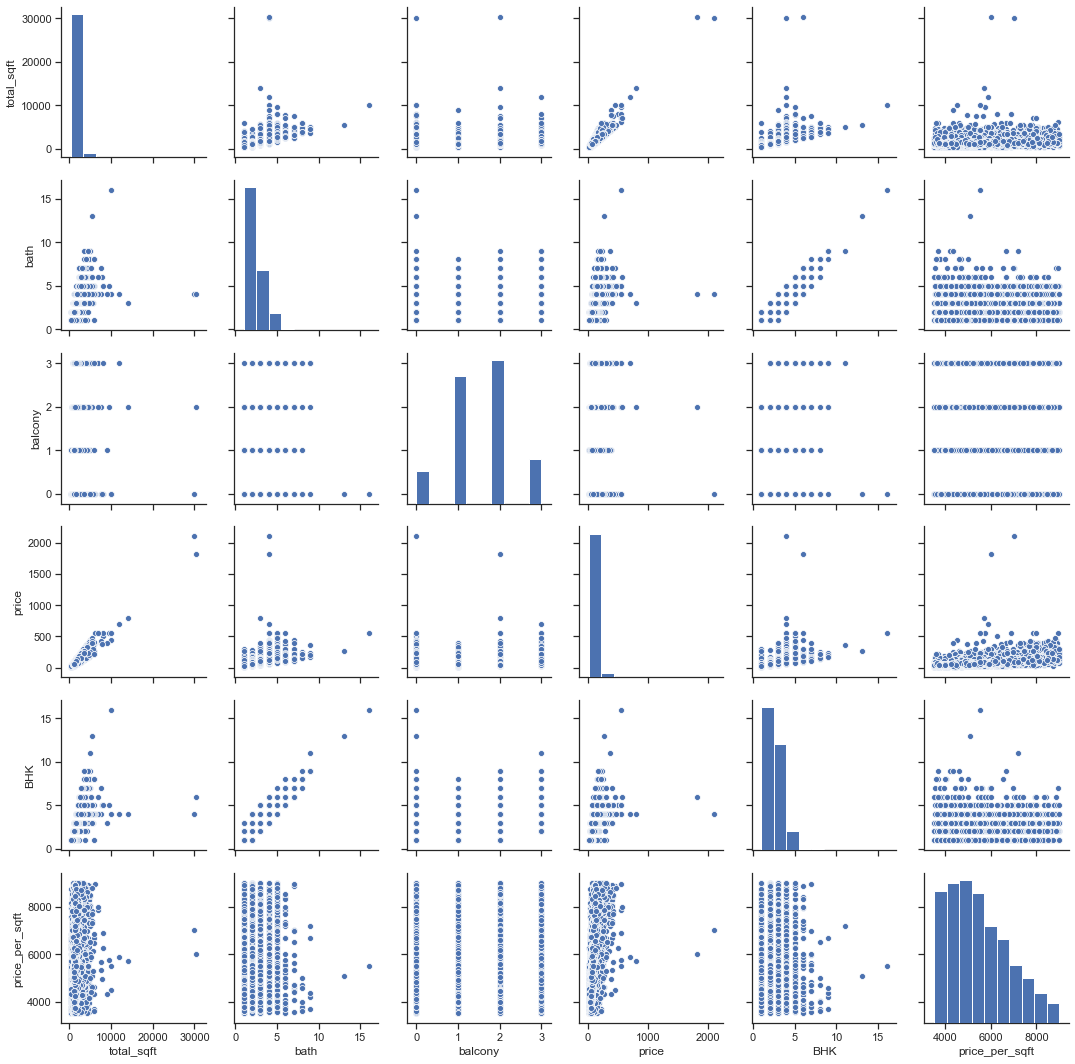

In [18]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df5)

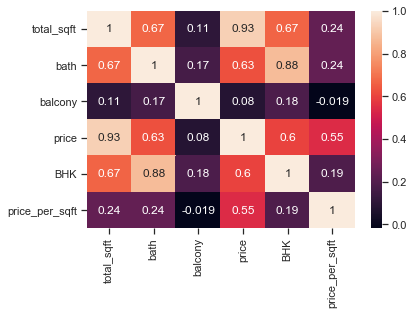

In [19]:
sns.heatmap(df5.corr(),annot=True)

In [20]:
#Since dependency of price on balcony is 0.078, which is negligible, we drop the column
df6 = df5.drop(['balcony'], axis="columns")
df6.head()

location  total_sqft  bath   price  BHK  price_per_sqft
0  Electronic City Phase II      1056.0   2.0   39.07    2     3699.810547
1                     other      2600.0   5.0  120.00    4     4615.384766
2               Uttarahalli      1440.0   2.0   62.00    3     4305.555664
3        Lingadheeranahalli      1521.0   3.0   95.00    3     6245.890625
4                  Kothanur      1200.0   2.0   51.00    2     4250.000000

In [21]:
dummies = pd.get_dummies(df6.location)
dummies.head(3)

5th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   

   9th Phase JP Nagar  Akshaya Nagar  Ambalipura  Ambedkar Nagar  Anandapura  \
0                   0              0           0               0           0   
1                   0              0           0               0           0   
2                   0              0           0               0           0   

   Ardendale  Balagere  ...  Uttarahalli  Varthur  Vidyaranyapura  \
0          0         0  ...            0        0               0   
1          0         0  ...            0        0               0   
2          0         0  ...            1        0               0   

   Vijayanagar  Vittasandra  Whitefield  Yelahanka  Yelahanka New Town  \
0            0            0           0          0                   0   
1            0            0           0          0                   0   
2            0            0           0          0                   0   

   Yeshwanthpur  other  
0             0      0  
1             0      1  
2             0      0  

[3 rows x 102 columns]

In [22]:
df7 = pd.concat([df6,dummies.drop('other',axis='columns')],axis='columns')
df7.head()

location  total_sqft  bath   price  BHK  price_per_sqft  \
0  Electronic City Phase II      1056.0   2.0   39.07    2     3699.810547   
1                     other      2600.0   5.0  120.00    4     4615.384766   
2               Uttarahalli      1440.0   2.0   62.00    3     4305.555664   
3        Lingadheeranahalli      1521.0   3.0   95.00    3     6245.890625   
4                  Kothanur      1200.0   2.0   51.00    2     4250.000000   

   5th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   9th Phase JP Nagar  ...  Tumkur Road  Uttarahalli  Varthur  Vidyaranyapura  \
0                   0  ...            0            0        0               0   
1                   0  ...            0            0        0               0   
2                   0  ...            0            1        0               0   
3                   0  ...            0            0        0               0   
4                   0  ...            0            0        0               0   

   Vijayanagar  Vittasandra  Whitefield  Yelahanka  Yelahanka New Town  \
0            0            0           0          0                   0   
1            0            0           0          0                   0   
2            0            0           0          0                   0   
3            0            0           0          0                   0   
4            0            0           0          0                   0   

   Yeshwanthpur  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 107 columns]

In [23]:
df7.head()

location  total_sqft  bath   price  BHK  price_per_sqft  \
0  Electronic City Phase II      1056.0   2.0   39.07    2     3699.810547   
1                     other      2600.0   5.0  120.00    4     4615.384766   
2               Uttarahalli      1440.0   2.0   62.00    3     4305.555664   
3        Lingadheeranahalli      1521.0   3.0   95.00    3     6245.890625   
4                  Kothanur      1200.0   2.0   51.00    2     4250.000000   

   5th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   9th Phase JP Nagar  ...  Tumkur Road  Uttarahalli  Varthur  Vidyaranyapura  \
0                   0  ...            0            0        0               0   
1                   0  ...            0            0        0               0   
2                   0  ...            0            1        0               0   
3                   0  ...            0            0        0               0   
4                   0  ...            0            0        0               0   

   Vijayanagar  Vittasandra  Whitefield  Yelahanka  Yelahanka New Town  \
0            0            0           0          0                   0   
1            0            0           0          0                   0   
2            0            0           0          0                   0   
3            0            0           0          0                   0   
4            0            0           0          0                   0   

   Yeshwanthpur  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 107 columns]

In [24]:
df8 = df7.drop(['location','price_per_sqft'], axis="columns")
df8.head()

total_sqft  bath   price  BHK  5th Phase JP Nagar  7th Phase JP Nagar  \
0      1056.0   2.0   39.07    2                   0                   0   
1      2600.0   5.0  120.00    4                   0                   0   
2      1440.0   2.0   62.00    3                   0                   0   
3      1521.0   3.0   95.00    3                   0                   0   
4      1200.0   2.0   51.00    2                   0                   0   

   8th Phase JP Nagar  9th Phase JP Nagar  Akshaya Nagar  Ambalipura  ...  \
0                   0                   0              0           0  ...   
1                   0                   0              0           0  ...   
2                   0                   0              0           0  ...   
3                   0                   0              0           0  ...   
4                   0                   0              0           0  ...   

   Tumkur Road  Uttarahalli  Varthur  Vidyaranyapura  Vijayanagar  \
0            0            0        0               0            0   
1            0            0        0               0            0   
2            0            1        0               0            0   
3            0            0        0               0            0   
4            0            0        0               0            0   

   Vittasandra  Whitefield  Yelahanka  Yelahanka New Town  Yeshwanthpur  
0            0           0          0                   0             0  
1            0           0          0                   0             0  
2            0           0          0                   0             0  
3            0           0          0                   0             0  
4            0           0          0                   0             0  

[5 rows x 105 columns]

In [25]:
df8.shape

(9207, 105)

# Data Cleaning is done. Now we will build a prediction model.

In [26]:
#Since price is dependent variable, we drop it for X
X = df8.drop(['price'],axis="columns")
X.shape

(9207, 104)

In [27]:
#y = price since price is dependent
y = df8.price
y.shape

(9207,)

In [28]:
y.head()

0     39.07
1    120.00
2     62.00
3     95.00
4     51.00
Name: price, dtype: float64

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [30]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
y_pred = lr_clf.predict(X_train)
y_test_pred = lr_clf.predict(X_test)
acc_linreg = metrics.r2_score(y_test, y_test_pred)
lr_clf.score(X_test,y_test)

0.8749112683415027

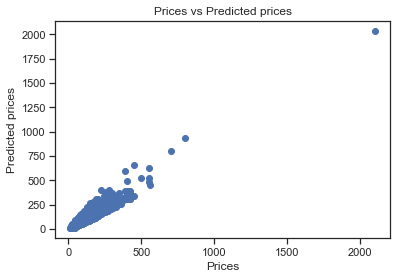

In [31]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [32]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
acc_rf = metrics.r2_score(y_test, y_test_pred)
reg.score(X_test,y_test)

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8180995061940203

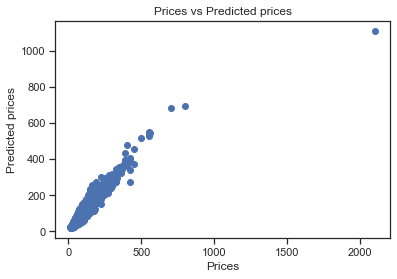

In [33]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [34]:
#SVM Regression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
from sklearn import svm
reg = svm.SVR()

In [36]:
reg.fit(X_train, y_train)
y_test_pred = reg.predict(X_test)
acc_svm = metrics.r2_score(y_test, y_test_pred)

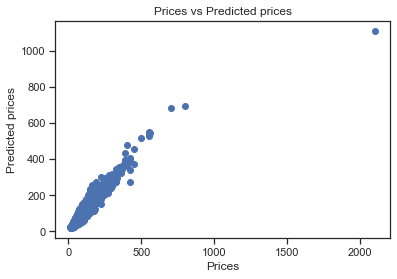

In [37]:
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [38]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

Model  R-squared Score
0        Linear Regression        87.491127
1            Random Forest        81.809951
2  Support Vector Machines        28.185861

# Hence the best model to be used for prediction is Linear Regression 

In [39]:
X.columns

Index(['total_sqft', 'bath', 'BHK', '5th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'Akshaya Nagar',
       'Ambalipura', 'Ambedkar Nagar',
       ...
       'Tumkur Road', 'Uttarahalli', 'Varthur', 'Vidyaranyapura',
       'Vijayanagar', 'Vittasandra', 'Whitefield', 'Yelahanka',
       'Yelahanka New Town', 'Yeshwanthpur'],
      dtype='object', length=104)

In [40]:
np.where(X.columns=='5th Phase JP Nagar')[0][0]

3

In [41]:
def predict_price(location,sqft,bath,bhk):  
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [42]:
np.zeros(len(X.columns))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [43]:
predict_price("5th Phase JP Nagar",1000,2,2)

43.78901211375789

In [44]:
def final_prediction(df):
    x=[]
    for index, row in df.iterrows():
        x.append(predict_price(row['Location'], row['Sqft'], row['Bath'], row['BHK']))
    return x

In [45]:
dfx=pd.read_csv("C:/Users/NEHA LAKHANI/Desktop/wearetrying/final_test.csv")
dfx.head()

Timestamp            Location  Sqft  Bath  BHK  \
0  2020/01/14 2:10:51 am GMT+5:30      Ambedkar Nagar  1000     2    2   
1  2020/01/16 8:55:58 pm GMT+5:30  7th Phase JP Nagar  1500     3    3   

                          Email  
0  sanjana.addagarla@spit.ac.in  
1      neha.lakhani@spit.ac.in

In [46]:
final_prediction(dfx)

[66.59658890314451, 92.08668615589384]

In [47]:
dfx["predicted_price"] = final_prediction(dfx)
dfx.head()

Timestamp            Location  Sqft  Bath  BHK  \
0  2020/01/14 2:10:51 am GMT+5:30      Ambedkar Nagar  1000     2    2   
1  2020/01/16 8:55:58 pm GMT+5:30  7th Phase JP Nagar  1500     3    3   

                          Email  predicted_price  
0  sanjana.addagarla@spit.ac.in        66.596589  
1      neha.lakhani@spit.ac.in         92.086686

In [48]:
dfx.to_csv('C:/Users/NEHA LAKHANI/Documents/ML Project/new.csv',index=False, header=None)